<a href="https://colab.research.google.com/github/AnhVietPham/Computer-Science/blob/master/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import torch

# **Computational graph and Autograd**

In [ ]:
a = torch.tensor(2., requires_grad = True)
b = torch.tensor(1., requires_grad = True)
c = a + b
d = b + 1
e = c * d
c.retain_grad()
d.retain_grad()
e.retain_grad()
e.backward()

print(f' de/de = {e.grad}')

print(f' de/dc = {c.grad}')
print(f' de/dd = {d.grad}')

print(f' de/da = {a.grad}')
print(f' de/db = {b.grad}')

 de/de = 1.0
 de/dc = 2.0
 de/dd = 3.0
 de/da = 2.0
 de/db = 5.0


# **Linear Regression**

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import norm

In [5]:
xs = np.array([751.6,779.2,810.3,864.7,857.5,874.9,906.8,942.9,988.8,1015.7])
ys = np.array([672.1,696.8,737.1,767.9,762.8,779.4,823.1,864.3,903.2,927.6])

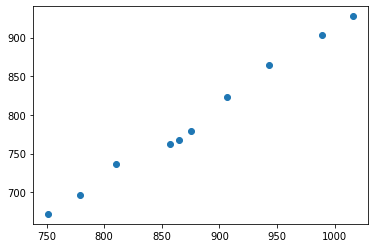

In [7]:
plt.scatter(xs, ys)
plt.show()

In [15]:
def pred(x, w0, w1):
  return w0 + w1*x

def loss(w0, w1, xs, ys):
  rss = 0
  n = len(xs)
  for i in range(n):
    y_hat = pred(xs[i], w0, w1)
    eps = ys[i] - y_hat
    rss += eps**2
  return rss

In [16]:
w0 = 0
w1 = 1
print(loss(w0, w1, xs, ys))

74199.45


In [17]:
w0 = 1
w1 = 2
print(loss(w0, w1, xs, ys))

9403070.57


0.9792669247154935
-67.58065088685044


<function matplotlib.pyplot.show>

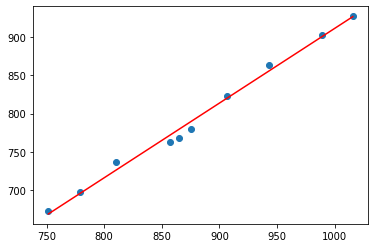

In [43]:
# Tìm mô hình tốt nhất thông qua đạo hàm của hàm loss
w1 = ((xs*ys).mean() -  xs.mean() * ys.mean()) / ((xs**2).mean() - xs.mean()**2)
print(w1)
w0 = ys.mean() - w1 * xs.mean()
print(w0)
xmin = xs.min()
xmax = xs.max()
y1 = w0 + w1*xmin
y2 = w0 + w1*xmax
plt.scatter(xs, ys)
plt.plot([xmin, xmax], [y1,y2], c = 'r')
plt.show

In [44]:
epss = (pred(xs, w0, w1) - ys)
print(epss.mean())

4.5474735088646414e-14


In [38]:
# Hàm Gauss
def gauss(mu, sigma, y):
  return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((y - mu) / sigma)** 2)

def likelihood(x, y, w0, w1, sigma):
  return norm.pdf(y, loc=w0 + w1 * x, scale=sigma)

def likelihoodSet(w0, w1, sigma, xs, ys):
  l = 1
  n = len(xs)
  for i in range(n):
    l *= likelihood(w0,w1, sigma, xs[i], ys[i])
  return l

def loglikelihoodSet(w0, w1, sigma, xs, ys):
  log = 1
  n = len(xs)
  for i in range(n):
    log += np.log(likelihood(w0,w1, sigma, xs[i], ys[i]))
  return log 

In [39]:
w0 = 0
w1 = 1
sigma = 1
print(likelihoodSet(w0, w1, sigma, xs, ys))
print(loglikelihoodSet(w0, w1, sigma, xs, ys))


1.0871630230772086e-33
-74.90173649667757


In [40]:
w0 = 1
w1 = 2
sigma = 1
print(likelihoodSet(w0, w1, sigma, xs, ys))
print(loglikelihoodSet(w0, w1, sigma, xs, ys))

2.349267022038734e-36
-81.03895997379765


In [47]:
df = pd.read_excel('/content/data-vn.xlsx', sheet_name = 'Data')
df.head()

,Khu vực,Số người,Thu nhập,Chi tiêu,Chi ăn uống
0,Thành thị,1,186.0,71.2,43.7
1,Thành thị,1,18.0,19.2,14.7
2,Thành thị,1,61.5,15.0,11.9
3,Thành thị,1,48.1,57.9,46.9
4,Thành thị,1,30.0,20.6,13.7


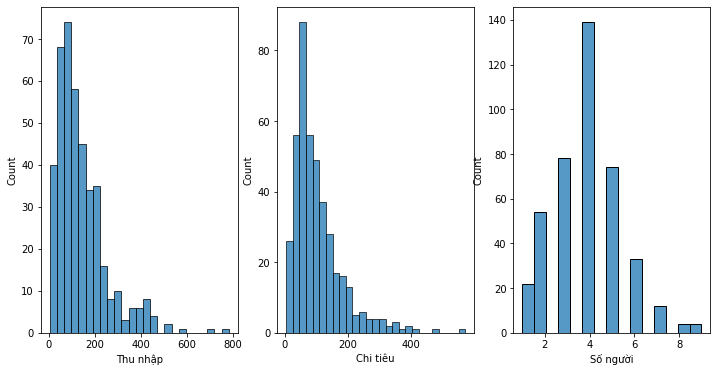

In [49]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.histplot(df["Thu nhập"])
plt.subplot(1,3,2)
sns.histplot(df["Chi tiêu"])
plt.subplot(1,3,3)
sns.histplot(df["Số người"])
plt.show()